<font color='red'><h1> Region Based Segmentation </h1></font>

### This workbook is the python implementation of region based segmentation, in this method the 'seed point(s)' is(are) choosen, the pixels near seed point having gray value less than threshold are segmented.

Importing libraries

In [42]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage.color import label2rgb
import scipy.ndimage as ndi

Input images

In [20]:
images = os.listdir('images/')

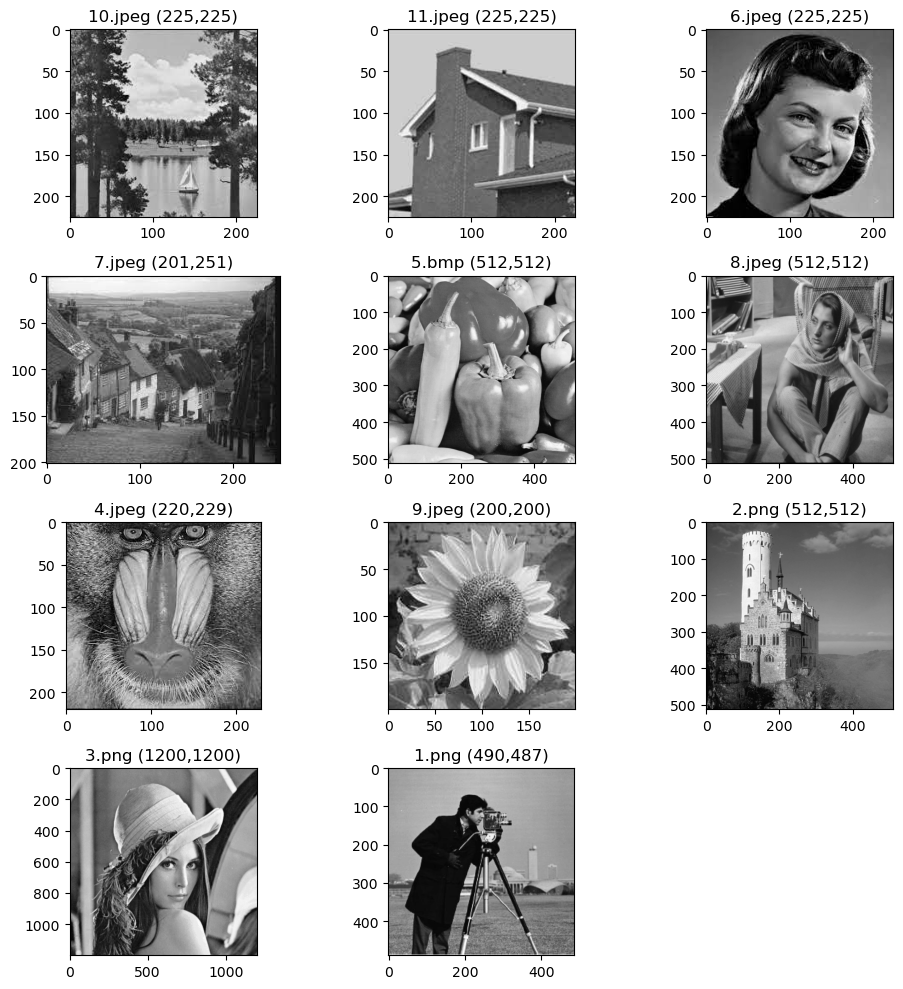

In [21]:
fig = plt.figure(figsize=(10, 10))

for i in range(len(images)):
    x = fig.add_subplot(4, 3, i+1)
    image = cv2.imread('images/' + images[i], cv2.IMREAD_GRAYSCALE)
    x.set_title("{image} ({shape[0]},{shape[1]})".format(image=images[i],shape=image.shape))
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()
plt.show()

In [22]:
image = cv2.imread('images/' + images[4], cv2.IMREAD_GRAYSCALE)

In [23]:
elevation_map = sobel(image)

Text(0.5, 1.0, 'elevation_map')

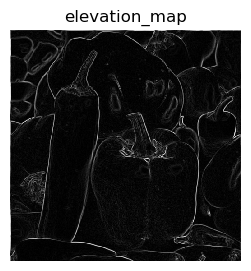

In [25]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')

In [28]:
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2

Text(0.5, 1.0, 'markers')

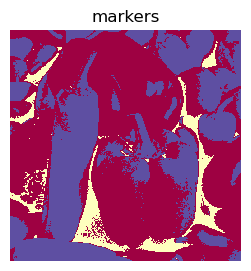

In [30]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.Spectral, interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

Text(0.5, 1.0, 'segmentation')

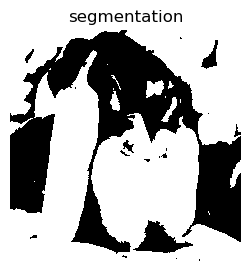

In [39]:
segmentation = watershed(elevation_map, markers)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

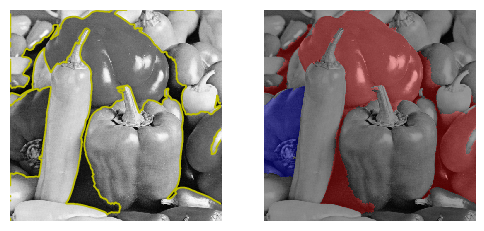

In [52]:
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=image)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
ax1.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box')